In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [27]:
training_start = 1
training_end = 3

test_start =4
test_end =7

In [28]:
# Define the mapping of attack types to integer keys
attack_type_map = {
    'Benign': 0,
    'DoS': 1,
    'scanning': 2,
    'DDoS': 3,
    'xss': 4,
    'Bot': 5,
    'Reconnaissance': 6,
    'password': 7,
    'Fuzzers': 8,
    'injection': 9,
    'Theft': 10,
    'Brute Force': 11,
    'Infilteration': 12,
    'Exploits': 13,
    'Generic': 14,
    'Analysis': 15,
    'Backdoor': 16,
    'mitm': 17,
    'Shellcode': 18,
    'ransomware': 19,
    'Worms': 20
}

drop_column={
    'Dataset',
    'IPV4_SRC_ADDR',
    'IPV4_DST_ADDR',
    'L7_PROTO',
    'SRC_TO_DST_SECOND_BYTES',
    'DST_TO_SRC_SECOND_BYTES',
    'FTP_COMMAND_RET_CODE',

}
drop_purposed_column= {
    'Label',
    'Attack'
}


In [29]:
dataset = pd.read_csv('dataset-v2/part_1.csv')
dataset.drop(columns=drop_column, inplace=True)
dataset.drop(columns=drop_purposed_column, inplace=True)
# dataset['Attack'] = dataset['Attack'].map(attack_type_map)



In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850145 entries, 0 to 850144
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   L4_SRC_PORT                  850145 non-null  int64
 1   L4_DST_PORT                  850145 non-null  int64
 2   PROTOCOL                     850145 non-null  int64
 3   IN_BYTES                     850145 non-null  int64
 4   IN_PKTS                      850145 non-null  int64
 5   OUT_BYTES                    850145 non-null  int64
 6   OUT_PKTS                     850145 non-null  int64
 7   TCP_FLAGS                    850145 non-null  int64
 8   CLIENT_TCP_FLAGS             850145 non-null  int64
 9   SERVER_TCP_FLAGS             850145 non-null  int64
 10  FLOW_DURATION_MILLISECONDS   850145 non-null  int64
 11  DURATION_IN                  850145 non-null  int64
 12  DURATION_OUT                 850145 non-null  int64
 13  MIN_TTL                      

In [31]:
list_attributes = dataset.columns

In [32]:
print(list_attributes)

Index(['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'IN_BYTES', 'IN_PKTS',
       'OUT_BYTES', 'OUT_PKTS', 'TCP_FLAGS', 'CLIENT_TCP_FLAGS',
       'SERVER_TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'DURATION_IN',
       'DURATION_OUT', 'MIN_TTL', 'MAX_TTL', 'LONGEST_FLOW_PKT',
       'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN', 'MAX_IP_PKT_LEN',
       'RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS',
       'RETRANSMITTED_OUT_BYTES', 'RETRANSMITTED_OUT_PKTS',
       'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT',
       'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES',
       'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES',
       'NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT',
       'ICMP_TYPE', 'ICMP_IPV4_TYPE', 'DNS_QUERY_ID', 'DNS_QUERY_TYPE',
       'DNS_TTL_ANSWER'],
      dtype='object')


In [43]:
dataset.drop(columns= list_attributes[0], inplace=True)

In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850145 entries, 0 to 850144
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   L4_DST_PORT                  850145 non-null  int64
 1   PROTOCOL                     850145 non-null  int64
 2   IN_BYTES                     850145 non-null  int64
 3   IN_PKTS                      850145 non-null  int64
 4   OUT_BYTES                    850145 non-null  int64
 5   OUT_PKTS                     850145 non-null  int64
 6   TCP_FLAGS                    850145 non-null  int64
 7   CLIENT_TCP_FLAGS             850145 non-null  int64
 8   SERVER_TCP_FLAGS             850145 non-null  int64
 9   FLOW_DURATION_MILLISECONDS   850145 non-null  int64
 10  DURATION_IN                  850145 non-null  int64
 11  DURATION_OUT                 850145 non-null  int64
 12  MIN_TTL                      850145 non-null  int64
 13  MAX_TTL                      

In [33]:
IsolationForest_model= IsolationForest()


In [34]:
def train_data(data):
    data.drop(columns=drop_column, inplace=True)
    # data['Attack'] = data['Attack'].map(attack_type_map)
    label = data['Label']
    # attack = data['Attack']
    label.replace(0,-1, inplace=True)
    data.drop(columns=drop_purposed_column, inplace=True)
    IsolationForest_model.fit(data)
    IsolationForest_model.decision_function(data)
    data['scores'] = IsolationForest_model.decision_function(data)


In [35]:
train_url =[f'dataset-v2/part_{i}.csv' for i in range(training_start,training_end)]
test_url =[f'dataset-v2/part_{i}.csv' for i in range(test_start,test_end)]

In [36]:
total_counts = Counter()

for train_path in train_url:
    data = pd.read_csv(train_path)
    num_type = Counter(data['Attack'])
    total_counts.update(num_type)
    train_data(data)
print("\nTổng số lượng của mỗi phần tử trong tất cả các file:", total_counts)



Tổng số lượng của mỗi phần tử trong tất cả các file: Counter({'Benign': 562804, 'DDoS': 486495, 'DoS': 400447, 'scanning': 85297, 'Reconnaissance': 58500, 'xss': 54867, 'password': 25568, 'injection': 15328, 'Bot': 3238, 'Brute Force': 2847, 'Infilteration': 2626, 'Exploits': 694, 'Fuzzers': 504, 'Backdoor': 413, 'Generic': 389, 'mitm': 154, 'ransomware': 73, 'Analysis': 57, 'Theft': 45, 'Shellcode': 30, 'Worms': 5})


In [45]:
prediction =[]
original_result=[]

for test_path in test_url:
    test = pd.read_csv(test_path)
    test.drop(columns=drop_column, inplace=True)
    # test['Attack'] = test['Attack'].map(attack_type_map)
    label = test['Label']
    
    attack = test['Attack']
    # label.replace(1,-1, inplace=True)
    label.replace(0,-1, inplace=True)
    test.drop(columns=drop_purposed_column, inplace=True)
    # test['scores'] = IsolationForest_model.decision_function(test)
    y_pred = IsolationForest_model.predict(test)
    test['Label']=label
    test['prediction']=y_pred
    prediction.append(y_pred)
    original_result.append(label)


    

In [46]:
#convert to 1D array
prediction = np.concatenate(prediction)
original_result = np.concatenate(original_result)

In [47]:
print(len(original_result))

2550339


In [48]:
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix

print("IF acc = {}".format(accuracy_score(original_result, prediction)))
print("-IF f1 = {}".format(f1_score(original_result,prediction)))
print("-IF roc auc = {}".format(roc_auc_score(original_result,prediction)))
print(confusion_matrix(original_result,prediction))

IF acc = 0.7148100703475107
-IF f1 = 0.8194455305054044
-IF roc auc = 0.5858360930221919
[[ 172514  671485]
 [  55846 1650494]]


# thử bỏ 1 thuộc tính tiến hành retrain

In [51]:
def train_and_evaluate_attribute(attribute):
    IsolationForest_evaluate_model = IsolationForest()
    
    def train_data(data):
        data.drop(columns=drop_column, inplace=True)
        data.drop(columns=attribute, inplace=True)
        # data['Attack'] = data['Attack'].map(attack_type_map)
        label = data['Label']
        # attack = data['Attack']
        data.drop(columns=drop_purposed_column, inplace=True)
        label.replace(0,-1, inplace=True)
        IsolationForest_evaluate_model.fit(data)
        
        
    for train_path in train_url:
        data = pd.read_csv(train_path)
        train_data(data)
    prediction =[]
    original_result=[]
    
    for test_path in test_url:
        test = pd.read_csv(test_path)
        test.drop(columns=drop_column, inplace=True)
        test.drop(columns=attribute, inplace=True)
        # test['Attack'] = test['Attack'].map(attack_type_map)
        label = test['Label']
        
        # attack = test['Attack']
        # label.replace(1,-1, inplace=True)
        label.replace(0,-1, inplace=True)
        test.drop(columns=drop_purposed_column, inplace=True)
        y_pred = IsolationForest_evaluate_model.predict(test)
        test['Label']=label
        test['prediction']=y_pred
        prediction.append(y_pred)
        original_result.append(label)
        
    prediction = np.concatenate(prediction)
    original_result = np.concatenate(original_result)
    
    acc = accuracy_score(original_result, prediction)
    f1 = f1_score(original_result,prediction)
    roc_auc = roc_auc_score(original_result,prediction)
    cm = confusion_matrix(original_result,prediction)
    return acc, f1, roc_auc, cm

In [52]:
acc_list = []
f1_list = []
roc_auc_list = []
cm_list = []
for attribute in list_attributes:
    acc, f1, roc_auc, cm = train_and_evaluate_attribute(attribute)
    acc_list.append(acc)
    f1_list.append(f1)
    roc_auc_list.append(roc_auc)
    cm_list.append(cm)
    

In [53]:
print(acc_list)

[0.7131130410506211, 0.712072395081595, 0.7046937681618012, 0.7075180985743464, 0.7139160715497038, 0.7141772133038, 0.7111925120542798, 0.7031202518567139, 0.7131051989559035, 0.7150916015478727, 0.7136694376708351, 0.7165443495943088, 0.7102193080998251, 0.7063766816881991, 0.7076925851818131, 0.7097546639878071, 0.7050360755962246, 0.7157636690651713, 0.7120778845478973, 0.7135000484249349, 0.716262426289211, 0.7121072924030883, 0.7275836663282803, 0.7178904451525856, 0.7148359492600788, 0.7114328722573744, 0.7065695972182522, 0.7164506365624335, 0.7051501780743658, 0.7115328589650238, 0.7198368530614949, 0.7099138585105744, 0.7103655631663085, 0.7144552155615391, 0.7057504904249984, 0.7021156795233888, 0.7053693646217228]


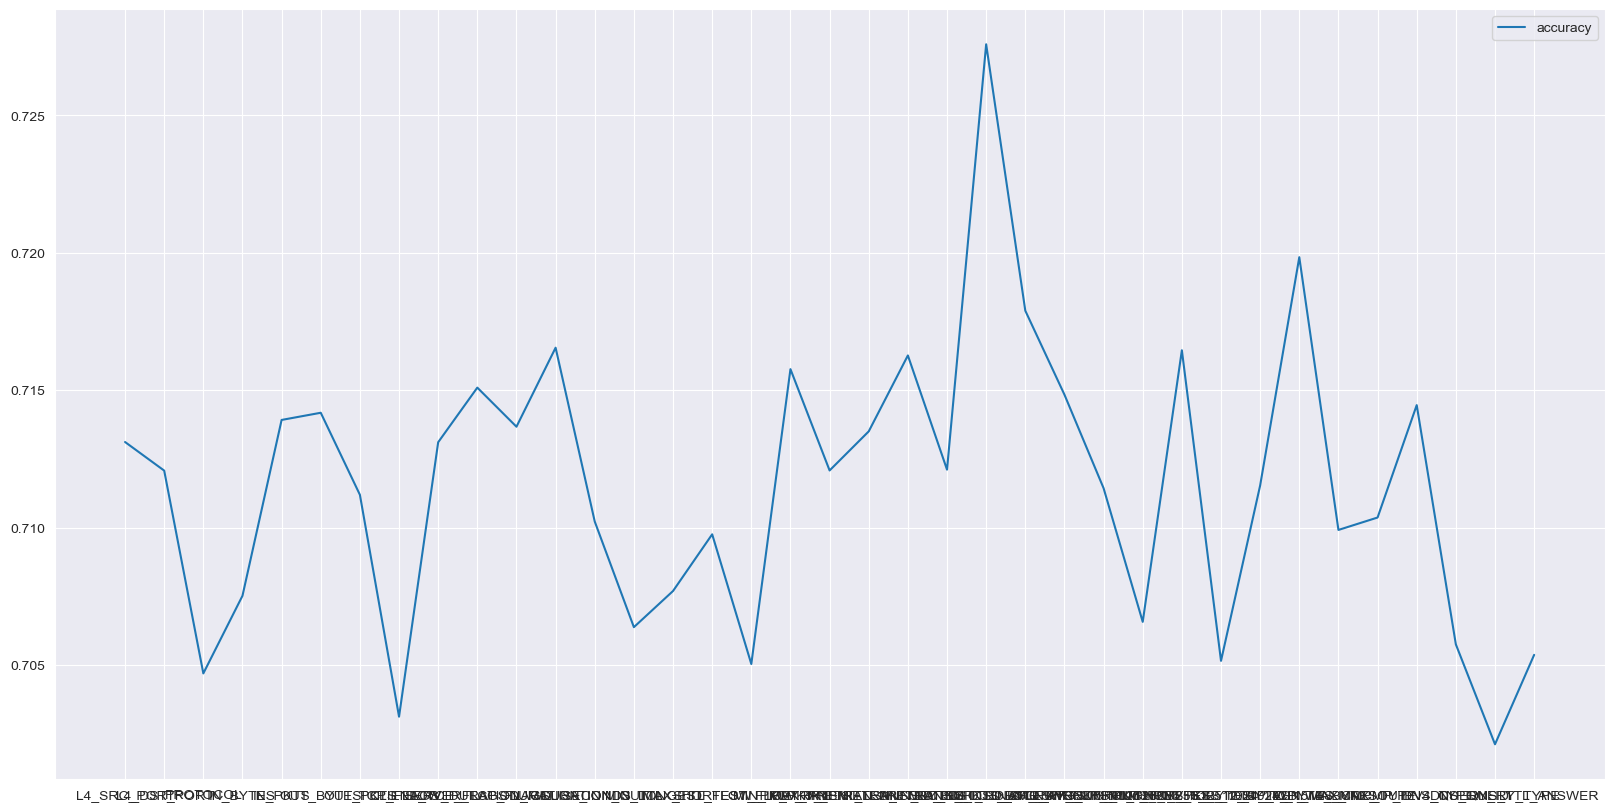

In [54]:
plt.figure(figsize=(20,10))
plt.plot(list_attributes, acc_list, label='accuracy')

plt.legend()
plt.show()

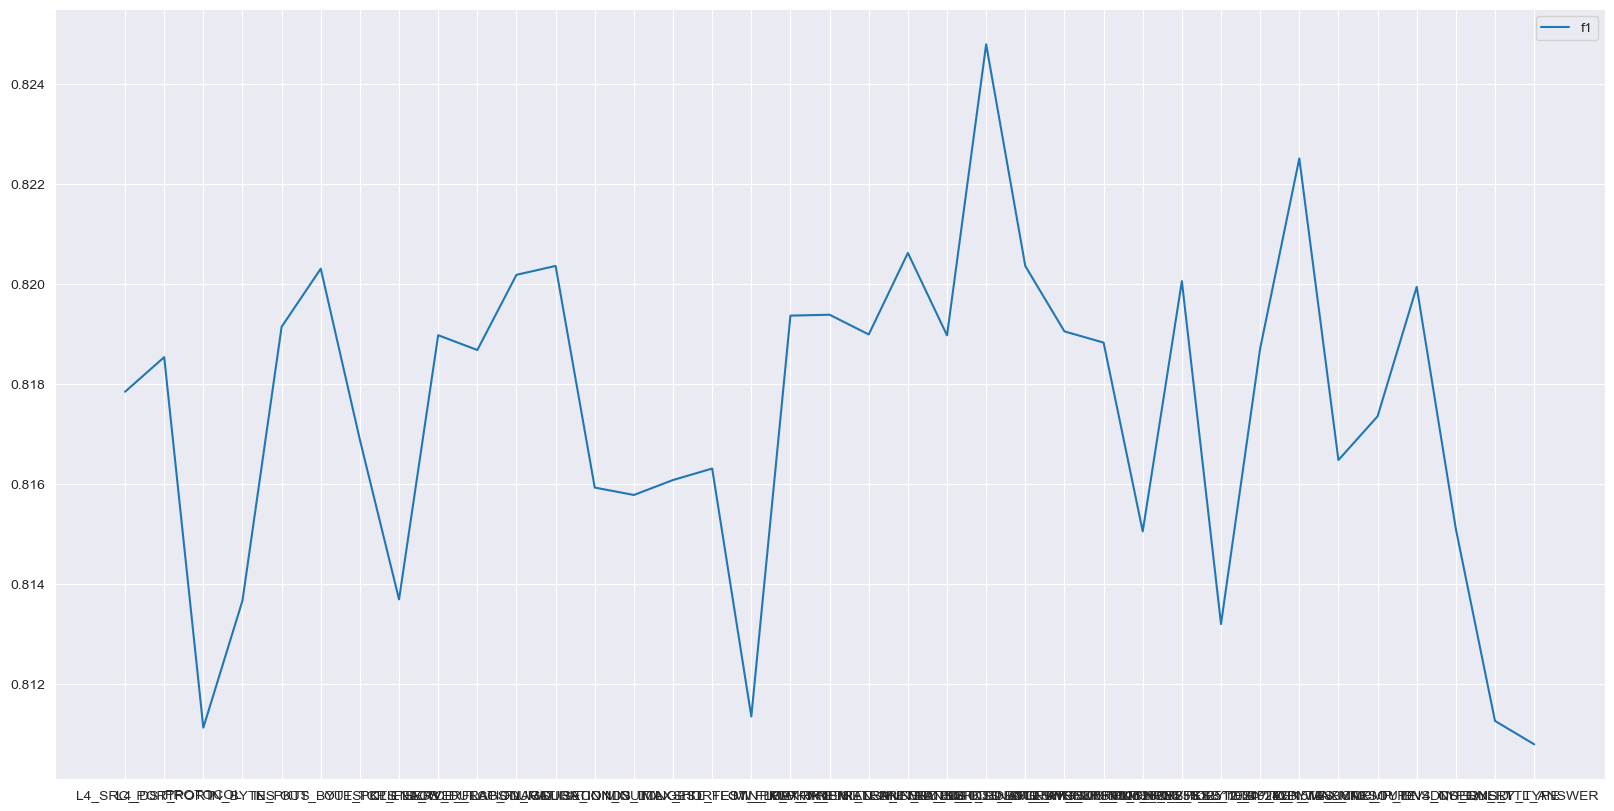

In [55]:
plt.figure(figsize=(20,10))
plt.plot(list_attributes, f1_list, label='f1')
plt.legend()
plt.show()